In [7]:
clear all;

## Fonction de creation du noyau

## Definition des variables

### Definition des variables d'entre

In [8]:
clear all;
% points de données d'entrée
X = 0:0.01:0.99;
X = X';

### Definition de modele : 

On commence par un modele alearatoire

In [9]:
% definition de modele
y = cos(2*pi*X);

### Repartition des variables en entrainement et test

In [10]:

X_test = X(1:2:end);
y_test = y(1:2:end);
X_train = X(2:2:end);
y_train = y(2:2:end);
n = length(X); % nombre de points de données
n2 = length(X_train);
% size(y_train)

In [11]:
size(X)


ans =

   100     1



### Definition des parametres 

In [12]:
 % parametres initiaux
omega = ones(n2, 1);
size(omega)


ans =

    50     1



## Definition de noyau 

### Implementation de fonction de noyau

fichier noyau.m : 

In [13]:
% %%file noyau.m

% function noyau = noyau(x, x1, choix)
%   switch choix
%       case 1
%           % Noyau linéaire
%           c = 0.1; 
%           y = x' * x1 + c;
%       case 2
%           % Noyau polynomial
%           alpha = 0.05*10^-5; % Valeur arbitraire pour alpha, vous pouvez ajuster selon vos besoins
%           c = 1; % Valeur arbitraire pour c, vous pouvez ajuster selon vos besoins
%           d = 2; % Valeur arbitraire pour d, vous pouvez ajuster selon vos besoins
%           y = (alpha .* (x' .* x1) + c) .^ d;
%       case 3
%           % Noyau gaussien
%           sigma = 0.1; 
%           y = exp(-norm(x - x1) .^ 2 ./ (2 * sigma^2));
%       case 4
%           % Noyau exponentiel
%           sigma = 5; 
%           y = exp(-norm(x - x1) ./ (2 * sigma ^ 2));
%       case 5
%           % Noyau laplacien
%           sigma = 1; 
%           y = exp(-norm(x - x1) / sigma);
%       case 6
%           % Noyau sinc
%           sigma = 1; 
%           y = prod(sin(sigma * (x - x1)) ./ (sigma * (x - x1)));
%       otherwise
%           error('Type de noyau non reconnu.');
%   end
%   noyau = y;
% end

### Definition de noyau linéaire

In [14]:
% choix de noyau linéaire
choix = 2;
K = zeros(n2, n2);
for i = 1:n2 
  K(i, :) = noyau(X_train, X_train(i, :), choix);
end  
size(K)


ans =

    50    50



## Definition du fonction

La fonction est définie comme suivant : 

$f(\omega, x) = \sum_{i=1}^{n} \omega_i K(x, x_i)$


In [15]:
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);

## Definition de function de risque empirique

La fonction de risque empirique est définit comme suivante :

$ J (\omega, y) =  \frac{1}{n} \sum_{i = 0}^{n} \|f(\omega_i) - y_i\|^2  $ 


In [16]:
J = @(omega, y) 1/n * norm(f(omega) - y);

## Definition de gradient J

In [17]:
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);

## Gradient descent

In [18]:
alpha = 0.001;
num_iterations = 5000;
hist_omega = zeros(n2, num_iterations);
for i = 1:num_iterations
  omega =  omega - (alpha * gradJ(omega));
  hist_omega(:, i) = omega;
  err(i) = J(omega, y_train);
end

In [19]:
err(i)


ans =

    0.3541



In [20]:
norm(gradJ(omega))


ans =

    0.0066



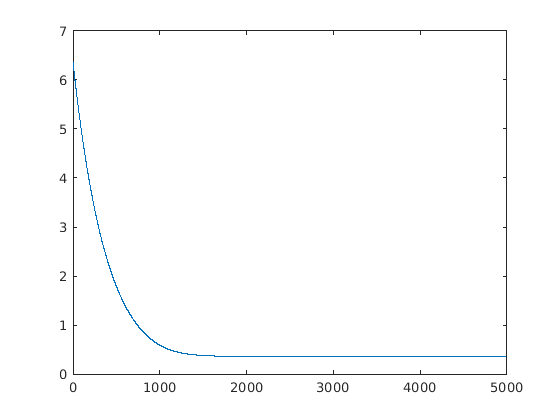

In [21]:
plot(1:num_iterations, err)

## Extraction des omega optimaux

In [24]:
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)


ans =

    0.3541



## Affichage de resultats

On affiche les y_train avec les y que notre model a predit

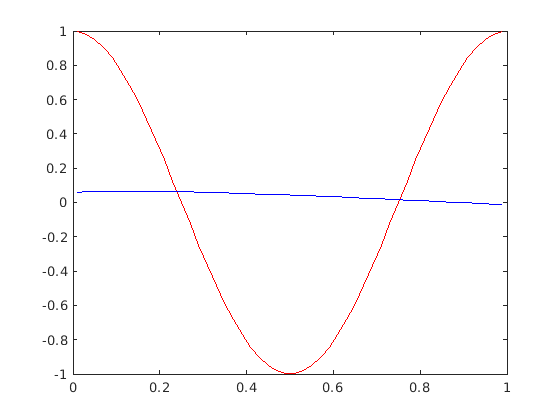

In [25]:
y_train_predit = f(opt_omega);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_train_predit, 'b')
hold off

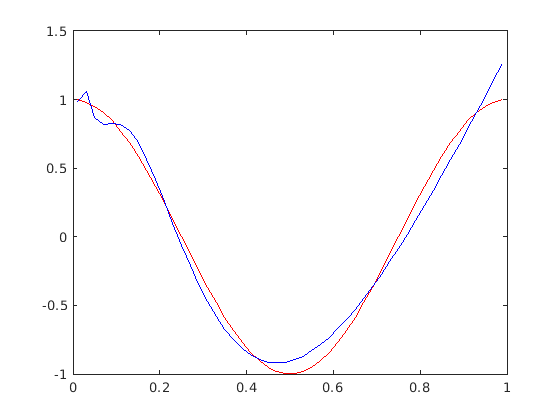

In [745]:
w_et = (K' * K) \ (K' * y_train);
y_opt = f(w_et);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_opt, 'b')
hold off

## Sur les donnees de test

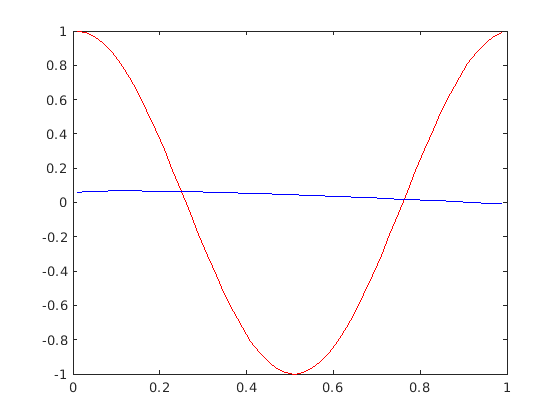

In [746]:
% y de test
y_test_predit = f(opt_omega);
plot(X_train, y_test, 'r')
hold on
plot(X_train, y_test_predit, 'b')
hold off

In [747]:
% y_train_predit = f(opt_omega, X_train );

norm(y_train_predit - y_train)


ans =

   35.4120



In [748]:
norm(y_test_predit - y_test)


ans =

   35.4120



In [749]:
w_et = (K' * K) \ (K' * y_train);
norm(opt_omega - w_et)
w_et;
opt_omega;



ans =

   4.8503e+07



## Utilisation des autres modèles

$
(1) \quad f^*(x) = |x|, \quad x \in [-1, 1] \\
(2) \quad f^*(x) = 3\|x\|^3 - 2\|x\|^2 + 3\|x\|^2 + 3, \quad x \in [-1, 1]^3 \\
(3) \quad f^*(x) = \sin(x_1 + x_2), \quad x \in [-2, 2]^2 \\
(4) \quad f^*(x) = \frac{1}{3}(x_1 + x_2)^3 - \frac{1}{4}(x_1 + x_2)
$

# Fonction 1)

In [45]:
clear all;
X = -1:0.01:0.99;
X = X';
X_train = X(1:2:end);
X_test = X(2:2:end);
% size(X_train)
y_train = modele(1, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
  for i = 1:n2 
    K(i, :) = noyau(X_train, X_train(i, :), 2);
  end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


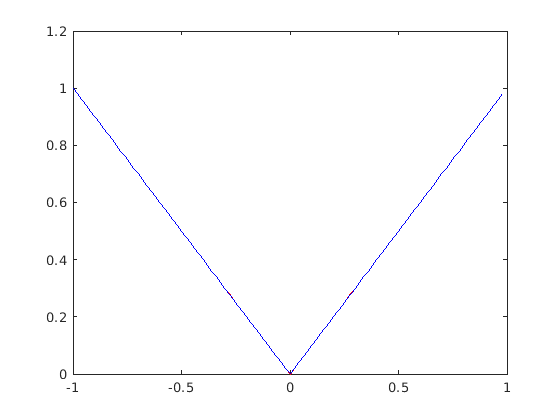

In [46]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_et, 'b')
hold off

In [47]:
alpha = 0.1;
num_iterations = 1000;
err = zeros(1, num_iterations);
for i = 1:num_iterations
  omega =  omega - (alpha * gradJ(omega));
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
end

In [48]:
norm(gradJ(omega))


ans =

   4.1013e-04



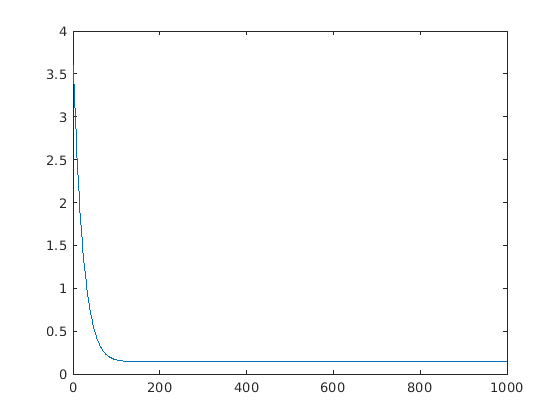

In [49]:
plot(1:num_iterations, err)


ans =

    0.1473



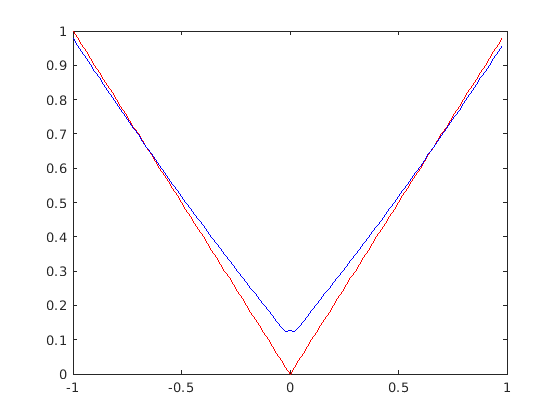

In [50]:
min_err = 0;
opt_omega = zeros(n2, 1);
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_predit, 'b')
hold off


# Fonction 2)

In [546]:
clear all;

X1 = -1:0.01:0.99;
X2 = -0.99:0.01:1;
X3 = (X1 - X2);
X = [X1', X2', X3'];
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(2, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
for i = 1:n2 
  for j = 1:n2
    K(i, j) = noyau(X_train(i, :), X_train(j, :), 4);
  end  
end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.01 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


In [544]:
size(y_train)


ans =

     1     1



In [513]:
size(X_train(1, :) .* X_train(1, :))


ans =

     1     3



In [514]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
J(w_et, y_train)
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_et', 'b')
hold off

Error using *
Incorrect dimensions for matrix multiplication. Check that the number of columns in the first matrix matches the number of rows in the second matrix. To operate on each element of the matrix individually, use TIMES (.*) for elementwise multiplication.



In [487]:
alpha = 0.01;
num_iterations = 10000;
err = zeros(1, num_iterations);
for i = 1:num_iterations
  omega =  omega - (alpha * gradJ(omega));
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
end

In [370]:
omega


omega =

   -0.0585
   -0.0645
   -0.0708
   -0.0772
   -0.0836
   -0.0900
   -0.0963
   -0.1024
   -0.1083
   -0.1139
   -0.1193
   -0.1243
   -0.1289
   -0.1331
   -0.1368
   -0.1402
   -0.1430
   -0.1453
   -0.1472
   -0.1485
   -0.1494
   -0.1497
   -0.1495
   -0.1489
   -0.1477
   -0.1460
   -0.1439
   -0.1413
   -0.1382
   -0.1347
   -0.1308
   -0.1264
   -0.1217
   -0.1166
   -0.1112
   -0.1054
   -0.0993
   -0.0929
   -0.0863
   -0.0794
   -0.0723
   -0.0650
   -0.0575
   -0.0499
   -0.0421
   -0.0343
   -0.0263
   -0.0184
   -0.0104
   -0.0023
    0.0056
    0.0136
    0.0215
    0.0292
    0.0369
    0.0444
    0.0518
    0.0589
    0.0659
    0.0726
    0.0791
    0.0853
    0.0912
    0.0969
    0.1022
    0.1071
    0.1117
    0.1160
    0.1198
    0.1233
    0.1264
    0.1291
    0.1314
    0.1333
    0.1347
    0.1358
    0.1365
    0.1368
    0.1367
    0.1362
    0.1354
    0.1343
    0.1329
    0.1312
    0.1293
    0.1272
    0.1249
    0.1226
    0.1201
    0.1177


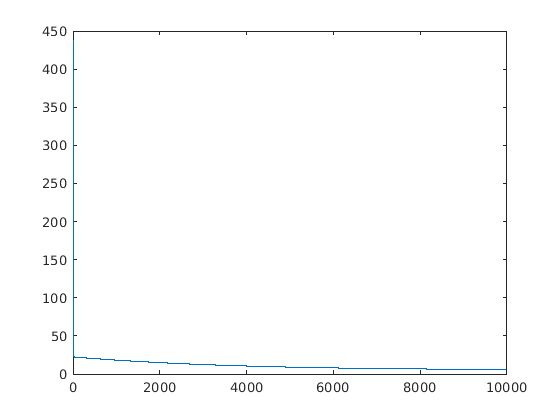

In [488]:
plot(1:num_iterations, err)


ans =

    5.9175



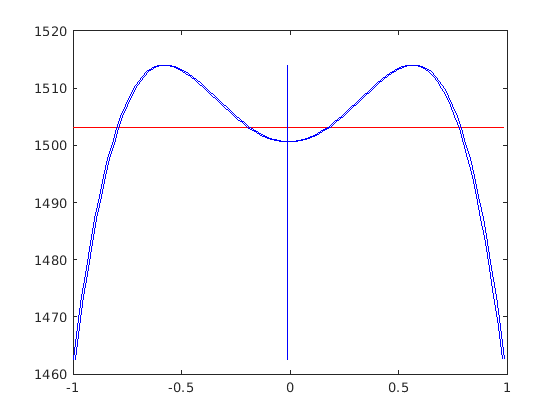

In [489]:
min_err = 0;
opt_omega = zeros(n2, 1);
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_predit, 'b')
hold off


# Fonction3)

In [536]:
clear all;
X1 = -2:0.02:1.99;
X2 = -1.99:0.02:2;
X = [X1', X2'];
% X = X';
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(3, X_train);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
  for i = 1:n2 
    for j = 1:n2
      K(i, j) = noyau(X_train(i, :), X_train(j, :), 4);
    end  
  end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.0001 * K * omega);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


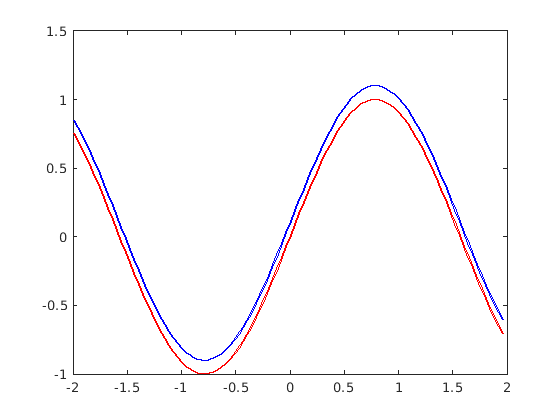

In [537]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_et, 'b')
hold off

In [542]:
alpha = 0.01;
num_iterations = 10000;
err = zeros(1, num_iterations);
for i = 1:num_iterations
  omega =  omega - (alpha * gradJ(omega));
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
end

In [539]:
omega


omega =

   -0.0235
   -0.0258
   -0.0290
   -0.0331
   -0.0382
   -0.0440
   -0.0505
   -0.0577
   -0.0654
   -0.0735
   -0.0820
   -0.0908
   -0.0998
   -0.1088
   -0.1179
   -0.1268
   -0.1356
   -0.1441
   -0.1522
   -0.1600
   -0.1672
   -0.1739
   -0.1799
   -0.1852
   -0.1898
   -0.1935
   -0.1964
   -0.1984
   -0.1995
   -0.1996
   -0.1988
   -0.1970
   -0.1942
   -0.1904
   -0.1856
   -0.1799
   -0.1733
   -0.1657
   -0.1573
   -0.1481
   -0.1381
   -0.1273
   -0.1159
   -0.1039
   -0.0913
   -0.0782
   -0.0648
   -0.0510
   -0.0370
   -0.0228
   -0.0085
    0.0058
    0.0201
    0.0342
    0.0481
    0.0616
    0.0748
    0.0876
    0.0998
    0.1115
    0.1225
    0.1328
    0.1424
    0.1512
    0.1592
    0.1663
    0.1725
    0.1779
    0.1823
    0.1857
    0.1883
    0.1899
    0.1906
    0.1904
    0.1894
    0.1875
    0.1849
    0.1815
    0.1775
    0.1728
    0.1676
    0.1618
    0.1557
    0.1492
    0.1424
    0.1355
    0.1285
    0.1215
    0.1146
    0.1078


In [547]:
plot(1:num_iterations, err)

Error using eval
Unrecognized function or variable 'num_iterations'.



In [548]:
min_err = 0;
opt_omega = zeros(n2, 1);
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_predit, 'b')
hold off


Error using eval
Unrecognized function or variable 'err'.



# Fonction 4)

In [643]:
clear all;
X1 = -1:0.02:0.99;
X2 = -0.99:0.02:1;
X = [X1', X2'];
% X = X';
X_train = X(1:2:end, :);
X_test = X(2:2:end, :);
% size(X_train)
y_train = modele(4, X_train);
y_test = modele(4, X_test);
% size(y_train)
n2 = length(X_train);
n = length(X);
omega = ones(n2, 1);
% size(omega)
K = ones(n2, n2);
  for i = 1:n2 
    for j = 1:n2
      K(i, j) = noyau(X_train(i, :), X_train(j, :), 3);
    end  
  end
% size(K)  
f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
J = @(omega, y) 1/n * norm(f(omega) - y);
% gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.0001 * K * omega);
gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);


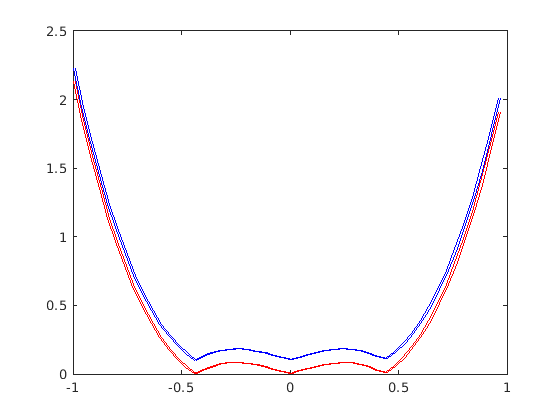

In [614]:
w_et = (K' * K) \ (K' * y_train);
y_et = f(w_et) + 0.1;
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_et, 'b')
hold off

In [649]:
alpha = 1;
num_iterations = 50000;
err = zeros(1, num_iterations);
while (norm(gradJ(omega)) > 10e-14)
  i = i + 1;
  omega =  omega - (alpha * gradJ(omega));
  alpha = n2 * norm(-gradJ(omega)) .^ 2 ./ norm(K' * (-gradJ(omega) .^ 2 / 2));
  err(i) = J(omega, y_train);
  hist_omega(:, i) = omega;
end

In [648]:
10e-14


ans =

   1.0000e-13



In [645]:
norm(gradJ(omega))


ans =

   NaN



In [637]:
omega


omega =

   Inf
   Inf
   Inf
   Inf
   Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
  -Inf
   Inf
   Inf
   Inf
   Inf



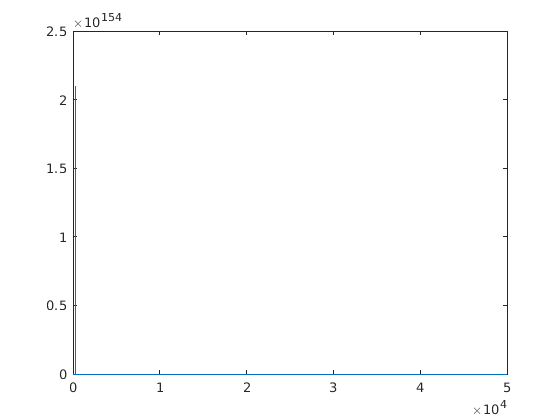

In [638]:
plot(1:num_iterations, err)

In [639]:
min_err = 0;
opt_omega = zeros(n2, 1);
min_err = find(err == min(err));
opt_omega = hist_omega(:, min_err);
J(opt_omega, y_train)
y_predit = f(opt_omega);
plot(X_train, y_train, 'r')
hold on
plot(X_train, y_predit, 'b')
hold off


Index in position 2 exceeds array bounds. Index must not exceed 268.



TEST

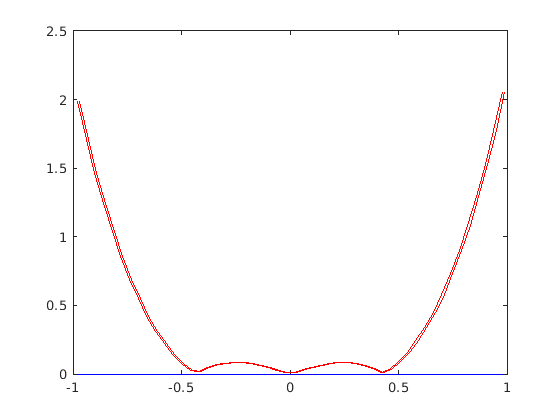

In [640]:
K2 = ones(n2, n2);
  for i = 1:n2 
    for j = 1:n2
      K2(i, j) = noyau(X_test(i, :), X_train(j, :), 3);
    end  
  end
  y_test = modele(4, X_test);

y_test_predit = K * opt_omega;
plot(X_test, y_test, 'r')
hold on
plot(X_test, y_test_predit, 'b')
hold off

In [460]:
clear all;

noyau = 4;
nmbr = 2;
for k = 2:nmbr
  disp(k)
  [X, y] = modele(k);
  size(X)
  size(y)
  X_train = X(1:2:end, :);
  X_test = X(2:2:end, :);
  y_train = X(1:2:end, :);
  y_test = X(2:2:end, :);
  
  n2 = length(X_train);
  n = length(X);
  omega = ones(n2, 1);
  % size(omega)
  K = ones(n2, n2);
    for i = 1:n2 
      for j = 1:n2
        K(i, j) = noyau(X_train(i, :), X_train(j, :), noyau);
      end  
    end
  % size(K)  
  f = @(omega) arrayfun(@(i) sum(K(i, :) * omega), 1:n2);
  J = @(omega, y) 1/n * norm(f(omega) - y);
  % gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train) + (2 * 0.0001 * K * omega);
  gradJ = @(omega) (1/n) * K' * ((K * omega) - y_train);
end


     2


ans =

   200     3


ans =

     1     1



Index in position 1 is invalid. Array indices must be positive integers or logical values.

